In [1]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

from benchmarks.qrom import QROM_Schedule
import numpy as np
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
from swiper.schedule_experiments import RegularTSchedule
from swiper.simulator import DecodingSimulator
import swiper.plot as plotter

In [2]:
qrom15 = QROM_Schedule([np.arange(15)], 15, 15)

In [3]:
loaded = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/qrom_15.lss', 'r').read())

In [4]:
qrom15.schedule._all_instructions[10]

Instruction(name='CONDITIONAL_S', idx=10, patches=frozenset({(1, 13)}), duration=<Duration.HALF_D_PLUS_2: 3>, conditioned_on_idx=frozenset({9}), conditional_dependencies=frozenset(), conditioned_on_completion_idx=frozenset(), conditional_completion_dependencies=frozenset(), merge_faces=frozenset())

In [5]:
loaded._all_instructions[10] == qrom15.schedule._all_instructions[10]

False

In [6]:
d=7
decoding_time = 9
speculation_time = 2
speculation_accuracy = 0.99

simulator = DecodingSimulator(d, lambda _: decoding_time, speculation_time, speculation_accuracy, speculation_mode='integrated')

In [7]:
success, device_data, window_data, decoding_data = simulator.run(
    schedule=loaded,
    scheduling_method='parallel',
    max_parallel_processes=None,
    progress_bar=True,
    save_animation_frames=False
)

Surface code rounds: 1974it [00:01, 1234.74it/s]


1635 2587


<Axes3D: >

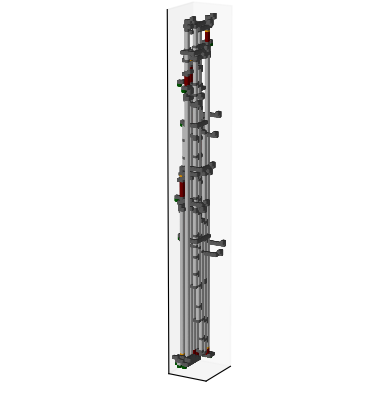

In [8]:
plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True)